IMPORT AND READ DATA

In [12]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
import sys
from factor_analyzer import FactorAnalyzer
from numpy.linalg import eig
if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [13]:
data_zero = pd.read_csv('data.csv',sep=';')

DESCRITIVE STATISTIC

In [14]:
data_zero.info()
data_zero.describe()
#data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30926 entries, 0 to 30925
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        30926 non-null  object 
 1   price         30926 non-null  int64  
 2   year          30926 non-null  float64
 3   manufacturer  30926 non-null  object 
 4   model         30926 non-null  object 
 5   condition     30926 non-null  object 
 6   cylinders     30926 non-null  object 
 7   fuel          30926 non-null  object 
 8   odometer      30926 non-null  float64
 9   title_status  30926 non-null  object 
 10  transmission  30926 non-null  object 
 11  drive         30926 non-null  object 
 12  size          30926 non-null  object 
 13  type          30926 non-null  object 
 14  paint_color   30926 non-null  object 
 15  state         30926 non-null  object 
 16  lat           30926 non-null  object 
 17  long          30926 non-null  object 
 18  posting_date  30926 non-nu

,price,year,odometer
count,30926.000000,30926.000000,3.092600e+04
mean,17460.544493,2010.854233,1.098463e+05
std,13176.655183,7.333666,1.038588e+05
min,116.000000,1905.000000,0.000000e+00
25%,7988.000000,2008.000000,6.900000e+04
50%,13900.000000,2012.000000,1.066390e+05
75%,23974.250000,2015.000000,1.432170e+05
max,155000.000000,2021.000000,9.999999e+06


BEFORE CONTINUE, I WILL TURN ALL DATA THAT IS NOT NUMERIC TO NUMERIC AND THEN APPLY ZSCORE.

In [15]:
#i wont use latitude and longitude to analyse since is not useful 
data = data_zero
data = data.drop(inplace=False,axis=1,columns={'lat','long'})
# #Get list of categorical variables
categories = (data.dtypes == 'object')
object_cols = list(categories[categories].index)
features = pd.DataFrame() #saving features
for i in object_cols:
    features[i] = data[[i]]

print("Categorical variables in the dataset:", object_cols)

#Label Encoding the object dtypes.
data_num = data
LE=LabelEncoder()
for i in object_cols:
    data_num[i]=data_num[[i]].apply(LE.fit_transform)
print("All features are now numerical")

#zscore
zscore = StandardScaler()
zscore.fit(data_num)
data_z = pd.DataFrame(zscore.transform(data_num),columns= data_num.columns)
print("All features are numerical and now scaled")

Categorical variables in the dataset: ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state', 'posting_date']
All features are now numerical
All features are numerical and now scaled


CORRELATIONS AND SOME PLOTS

<AxesSubplot:>

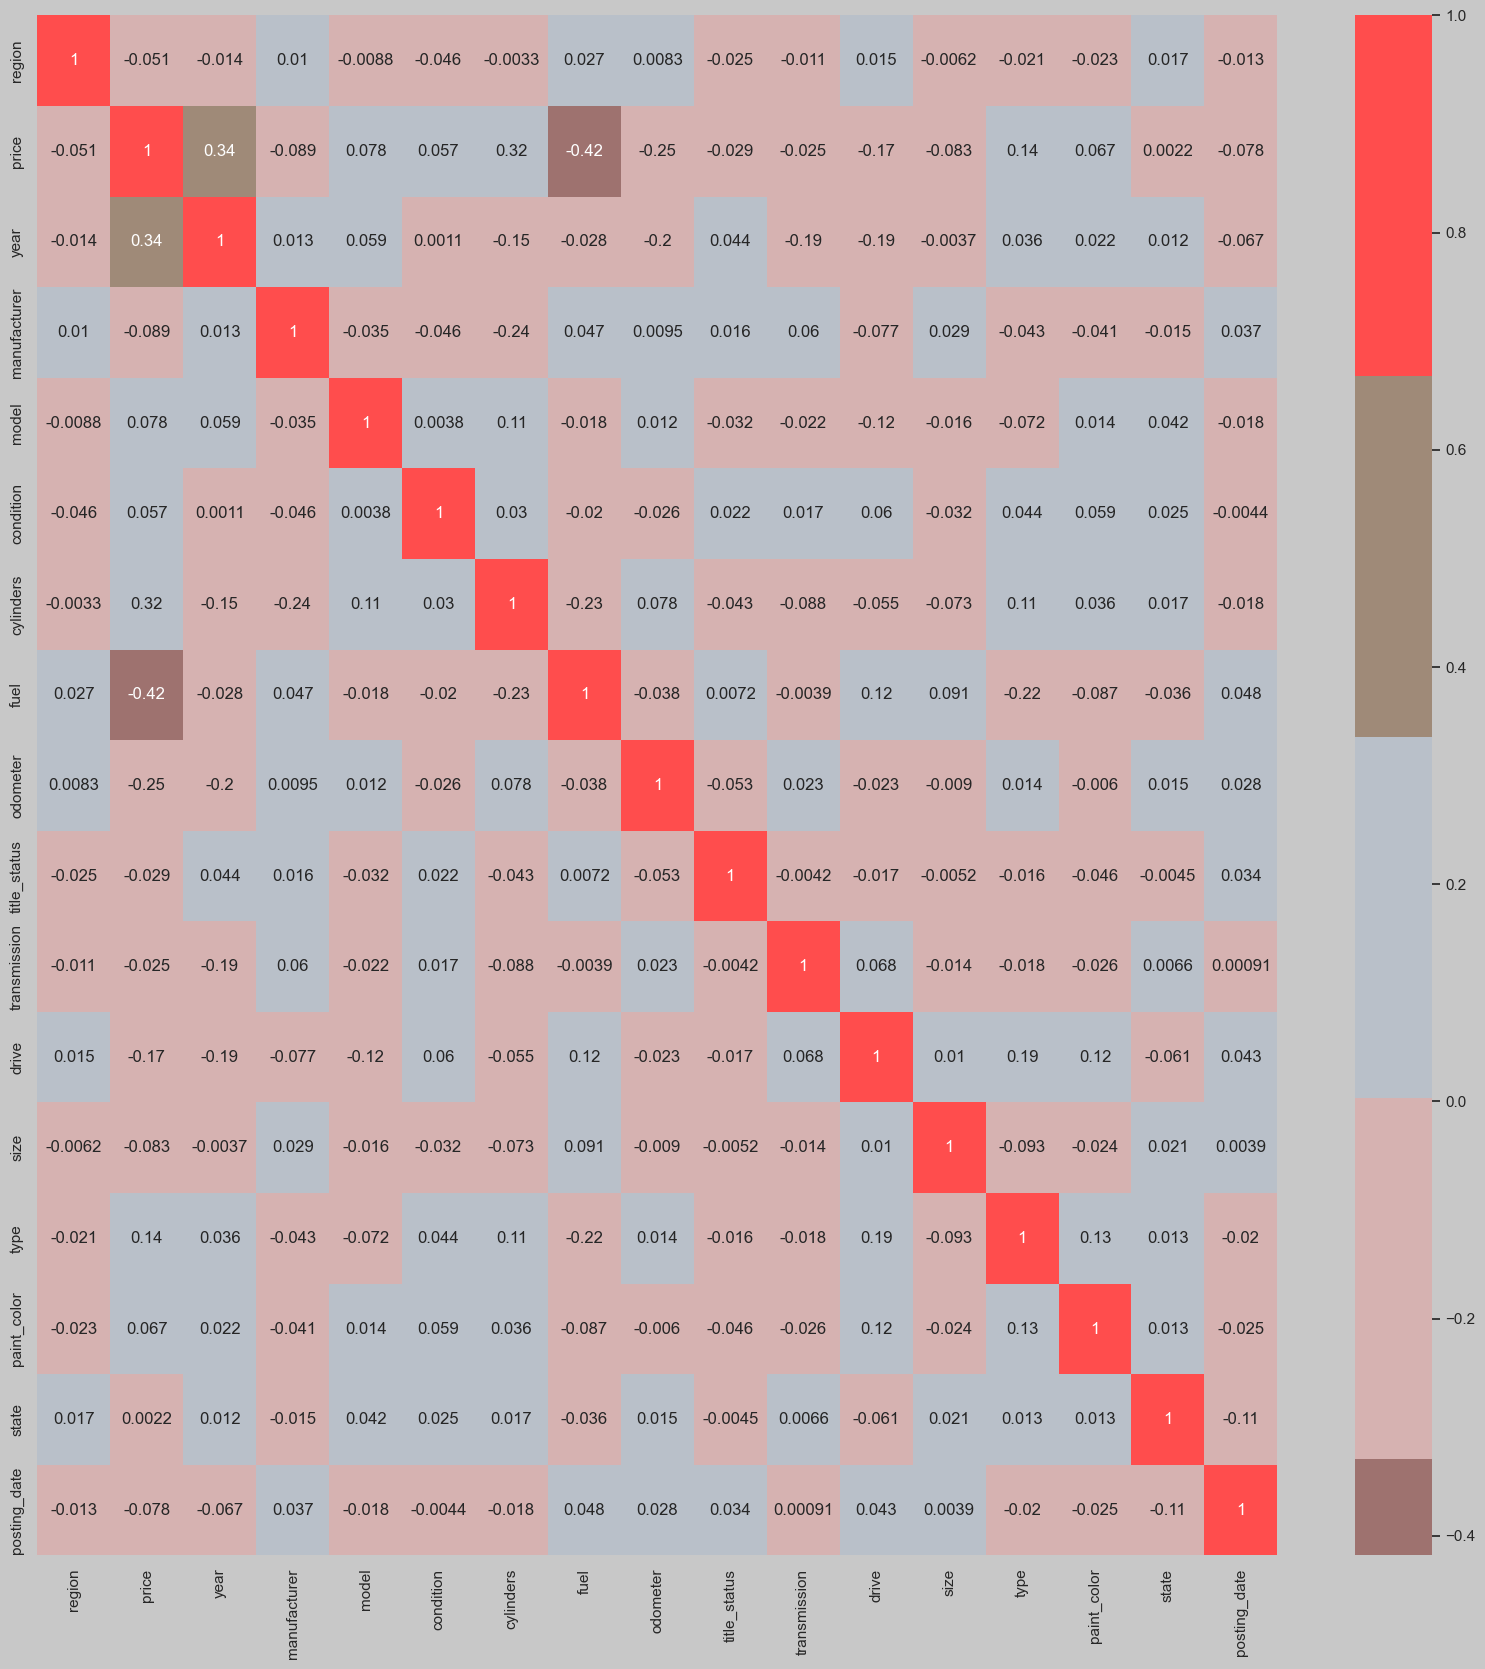

In [16]:
#correlation matrix
cmap = colors.ListedColormap(["#682f2f", "#9e726f", "#d6b2b1", "#b9c0c9", "#9f8a78", "#ff4d4d"])
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)
#corrmat #to see table with complete number

<AxesSubplot:>

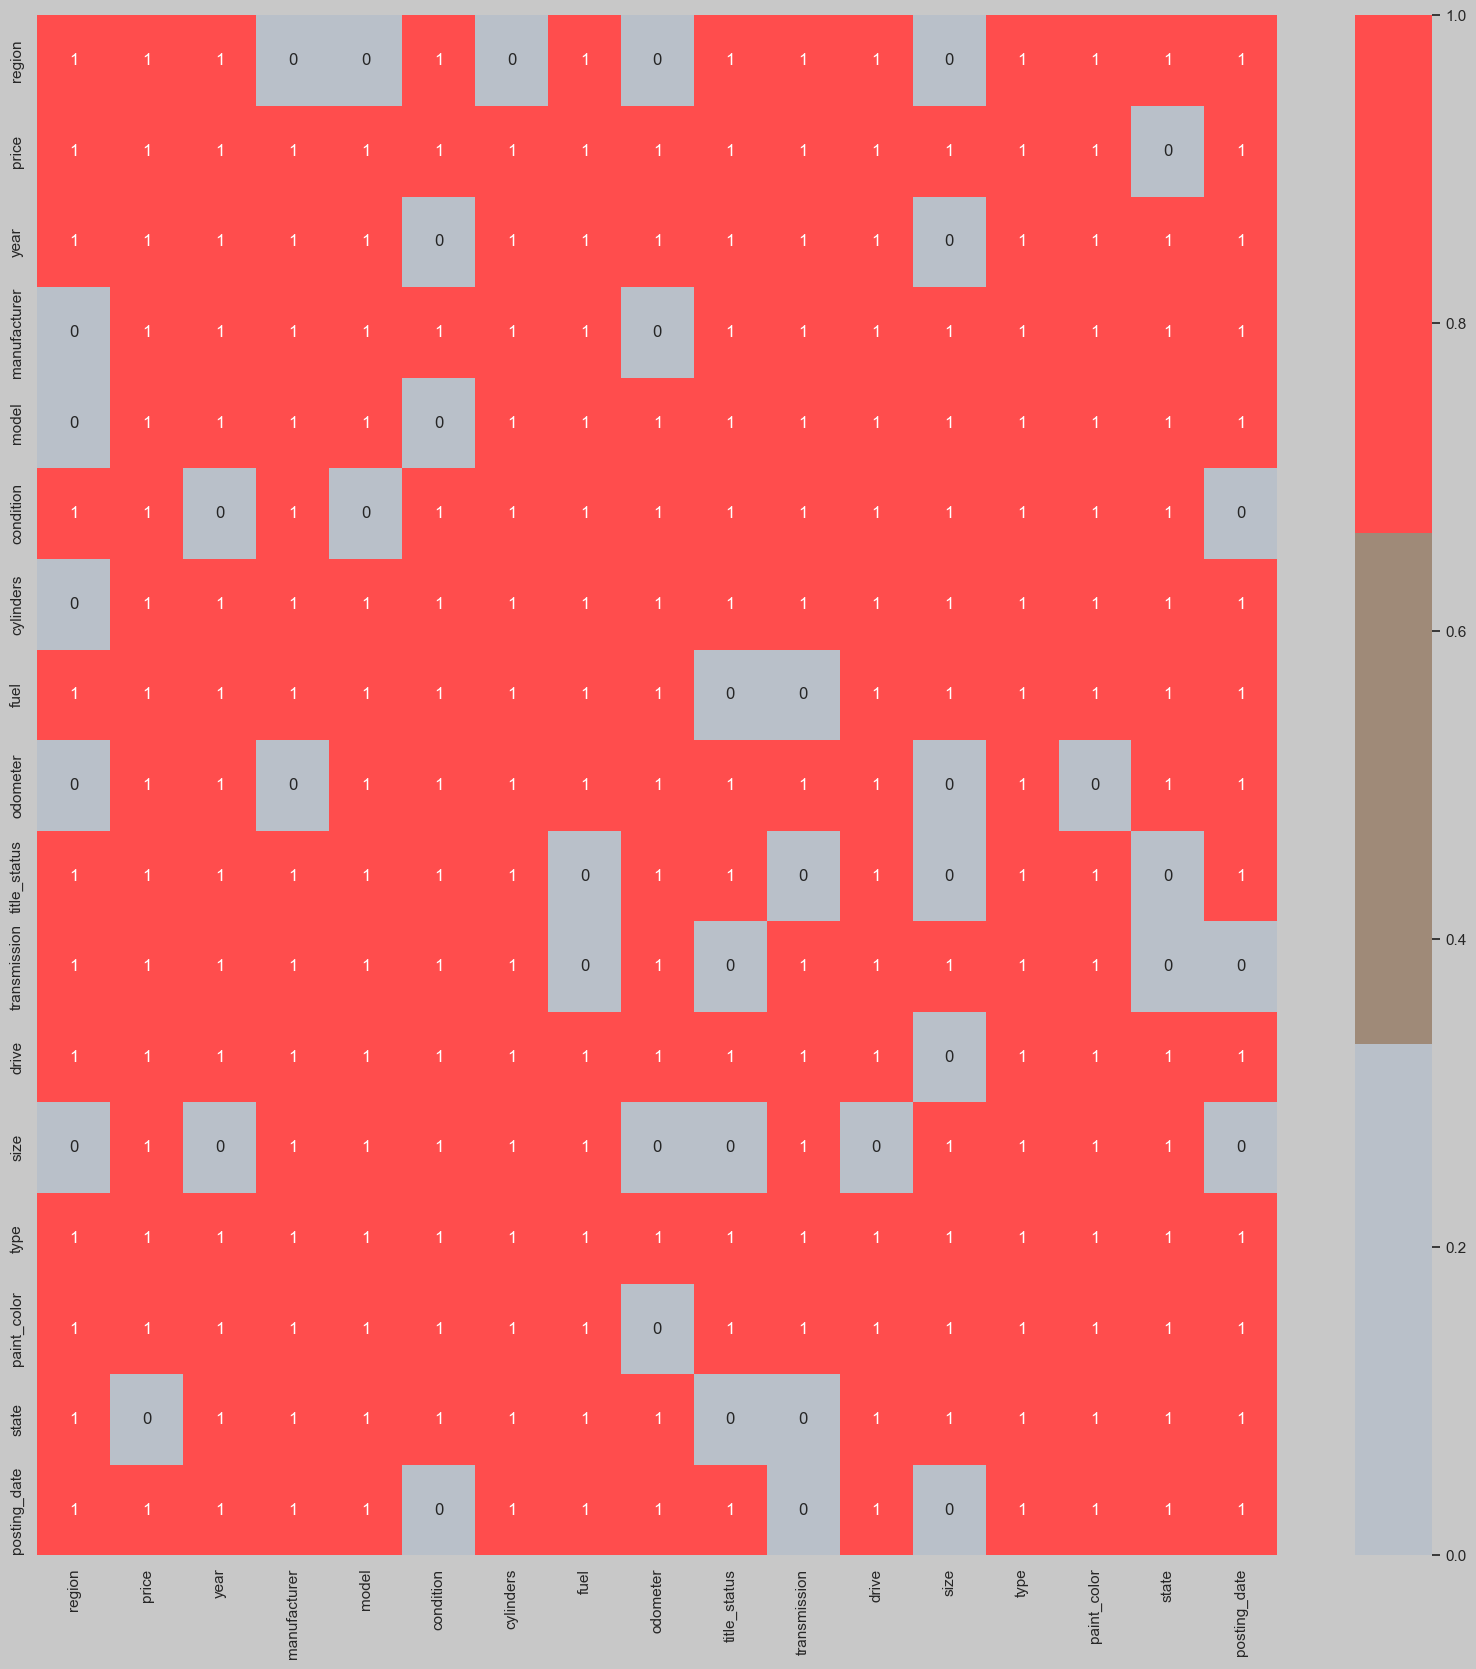

In [17]:
#correlation matrix with p-value
from scipy.stats import kendalltau, pearsonr, spearmanr

def kendall_pval(x,y):
    return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]
    
def pearsonr_pval_ok_ko(x,y):
    if (pearsonr(x,y)[1] < 0.05):
        result = 1 #is significant
    else:
        result = 0 #not useful
    return result

#correlation matrix
cmap = colors.ListedColormap(["#682f2f", "#9e726f", "#d6b2b1", "#b9c0c9", "#9f8a78", "#ff4d4d"])
corrmat= data_z.corr(method=pearsonr_pval_ok_ko)
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

#   value = 0: P-VALUE shows that is this correlation is statistically NOT relevant 
#   value = 1: P-VALUE shows that is this correlation is statistically relevant 

STARTING FACTOR ANALYSE

In [18]:
#BARTLETT SPHERICITY - CHI 2 - check if we can continue 
columns = []
for c in data:
    columns.append(data[c].to_numpy())

print('If pvalue < 0.05, we are ok to continue the Factor ANALYSE.')
stats.bartlett(columns[0],columns[1],columns[2],columns[3],columns[4],columns[5],columns[6],columns[7],columns[8],columns[9],columns[10],columns[11],columns[12],columns[13],columns[14],columns[15],columns[16])

If pvalue < 0.05, we are ok to continue the Factor ANALYSE.


BartlettResult(statistic=7593687.015823919, pvalue=0.0)

In [19]:
#covmatrix, eigenvalues and vectors
cov_matrix = data_z.cov() #np.cov(data_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

In [20]:
cov_matrix

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
region,1.000032,-0.050549,-0.014317,0.010038,-0.008785,-0.045769,-0.003339,0.027496,0.008341,-0.025014,-0.011281,0.015252,-0.006157,-0.021287,-0.023127,0.017136,-0.012880
price,-0.050549,1.000032,0.342180,-0.088880,0.077576,0.056903,0.319851,-0.418059,-0.252716,-0.028506,-0.025124,-0.173872,-0.082923,0.142519,0.067235,0.002231,-0.078283
year,-0.014317,0.342180,1.000032,0.012614,0.058689,0.001077,-0.145023,-0.028097,-0.204153,0.044048,-0.194307,-0.189887,-0.003689,0.035574,0.021953,0.011677,-0.067246
manufacturer,0.010038,-0.088880,0.012614,1.000032,-0.034729,-0.045795,-0.242363,0.046995,0.009501,0.015762,0.059886,-0.076848,0.028861,-0.043315,-0.041165,-0.014553,0.036841
model,-0.008785,0.077576,0.058689,-0.034729,1.000032,0.003753,0.105656,-0.018486,0.011732,-0.032185,-0.022330,-0.118318,-0.015655,-0.071561,0.013613,0.041984,-0.018142
condition,-0.045769,0.056903,0.001077,-0.045795,0.003753,1.000032,0.030445,-0.020013,-0.026463,0.021771,0.017101,0.059768,-0.031609,0.043632,0.059311,0.024597,-0.004383
cylinders,-0.003339,0.319851,-0.145023,-0.242363,0.105656,0.030445,1.000032,-0.233847,0.077627,-0.043437,-0.087764,-0.054744,-0.072630,0.112462,0.036034,0.017132,-0.018280
fuel,0.027496,-0.418059,-0.028097,0.046995,-0.018486,-0.020013,-0.233847,1.000032,-0.037504,0.007163,-0.003889,0.116117,0.091474,-0.221142,-0.086872,-0.035986,0.047560
odometer,0.008341,-0.252716,-0.204153,0.009501,0.011732,-0.026463,0.077627,-0.037504,1.000032,-0.052877,0.023054,-0.023332,-0.008990,0.014069,-0.005988,0.015431,0.027530
title_status,-0.025014,-0.028506,0.044048,0.015762,-0.032185,0.021771,-0.043437,0.007163,-0.052877,1.000032,-0.004171,-0.016712,-0.005180,-0.015854,-0.045645,-0.004531,0.033715


In [21]:
print("Eigenvalues")
print(eigen_vals)
print()

Eigenvalues
[1.99875161 0.35432441 1.52713118 1.29935451 0.59820917 0.62805257
 0.76246172 1.12534574 1.11757851 0.82610569 0.86348136 1.06344654
 0.90979141 0.92918998 0.98066896 1.01471977 1.00193661]



In [22]:
print("Eigenvectors as columns")
print(eigen_vecs)

Eigenvectors as columns
[[ 5.98378524e-02 -2.64264995e-02  2.87729196e-03 -8.95977281e-02
   2.19075344e-02 -1.06253425e-02  7.76092480e-02  1.55427941e-01
   4.99726872e-02  5.92342940e-03 -1.65400385e-01  4.82763564e-01
  -1.04827684e-01  5.02371935e-01  3.83425416e-01  4.80584023e-01
   2.29387014e-01]
 [-5.75255733e-01 -6.87205055e-01  1.27932484e-01  7.01878963e-02
  -2.97778988e-01 -6.44448089e-02 -1.48701081e-02 -1.37173793e-01
   2.42770107e-02 -3.41027421e-02  7.44949042e-03 -3.30838694e-02
  -3.96464186e-02  7.96575304e-02 -1.07722525e-01  3.75196336e-02
   1.99605435e-01]
 [-2.73261560e-01  4.35401741e-01  5.04286093e-01  2.63446221e-01
  -3.69602257e-01 -1.41480904e-01  4.38891890e-01  1.00091671e-01
  -4.50142542e-02  7.55601493e-02  3.75389224e-02  1.29681277e-01
  -3.51259151e-02 -4.31274325e-02  8.90574421e-02 -9.16745190e-02
  -8.59458290e-02]
 [ 1.89636316e-01  6.09427671e-02  2.41059039e-01  1.00205988e-01
  -2.19296706e-01 -1.54171214e-01 -5.46016570e-01 -3.47425060

In [23]:
#eigen value related to each factor created and the % it represents

sum = 0
for i,j in zip(cov_matrix.columns,eigen_vals):
    print(i + " - " + "%.5f"%j +" - "+   "%.2f"%(j/np.sum(eigen_vals)*100)+"%.")
    sum = sum +  j/np.sum(eigen_vals)
print("\nTotal: "+ str(sum*100) + "%.")

region - 1.99875 - 11.76%.
price - 0.35432 - 2.08%.
year - 1.52713 - 8.98%.
manufacturer - 1.29935 - 7.64%.
model - 0.59821 - 3.52%.
condition - 0.62805 - 3.69%.
cylinders - 0.76246 - 4.48%.
fuel - 1.12535 - 6.62%.
odometer - 1.11758 - 6.57%.
title_status - 0.82611 - 4.86%.
transmission - 0.86348 - 5.08%.
drive - 1.06345 - 6.26%.
size - 0.90979 - 5.35%.
type - 0.92919 - 5.47%.
paint_color - 0.98067 - 5.77%.
state - 1.01472 - 5.97%.
posting_date - 1.00194 - 5.89%.

Total: 99.99999999999997%.


In [24]:
#Kaiser criteria to eigen values (use only when eigen values > 1)
sum = 0
k = 0
print("Eigen Values > 1 (ok to Kaiser criteria):")
for i,j in zip(cov_matrix.columns,eigen_vals):
    if j > 1:
        k+=1
        #print(i + " - " + str(j/np.sum(eigen_vals)*100)+"%.")
        print(i + " - " + str(j))
print("new k must be: " + str(k))
    

Eigen Values > 1 (ok to Kaiser criteria):
region - 1.9987516095144404
year - 1.5271311767359865
manufacturer - 1.2993545061885574
fuel - 1.1253457447885804
odometer - 1.1175785147989978
drive - 1.063446544423114
state - 1.0147197652172129
posting_date - 1.0019366107139023
new k must be: 8


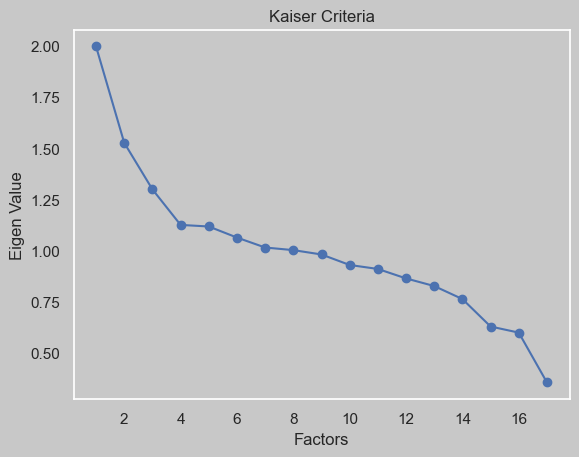

In [25]:
#just a visual format of kaiser criteria
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=data_z.shape[1])
fa.fit(data_z)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,data_z.shape[1]+1),ev)
plt.plot(range(1,data_z.shape[1]+1),ev)
plt.title('Kaiser Criteria')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

#when drop below 1 = discard

Loadings indicate how much a factor explains a variable. The loading score will range from -1 to 1.Values close to -1 or 1 indicate that the factor has an influence on these variables. Values close to 0 indicates that the factor has a lower influencer on the variable.

In [26]:
from factor_analyzer import FactorAnalyzer
#        (a) varimax (orthogonal rotation) (b) promax (oblique rotation) (c) oblimin (oblique rotation) (d) oblimax (orthogonal rotation) (e) quartimin (oblique rotation) (f) quartimax (orthogonal rotation) (g) equamax (orthogonal rotation)

fa = FactorAnalyzer(n_factors=k)
fa.fit(data_z)
print(pd.DataFrame(fa.loadings_,index=data_z.columns))

                     0         1         2         3         4         5  \
region       -0.031032 -0.001418  0.025771  0.045865  0.013211  0.040000   
price         0.467580  0.783729  0.168508 -0.134055 -0.125760 -0.057650   
year          0.021282  0.305937 -0.226823 -0.158982  0.590016  0.033403   
manufacturer  0.034283 -0.035482 -0.328739 -0.086436 -0.056015 -0.026241   
model        -0.060453 -0.019458  0.067907 -0.212197  0.043356  0.027502   
condition    -0.018649  0.020100  0.034518  0.039893 -0.042962  0.044628   
cylinders     0.237433 -0.011750  0.806580 -0.082295 -0.010313 -0.053180   
fuel         -0.605830 -0.031499 -0.012655  0.122868  0.081828 -0.070313   
odometer      0.108039 -0.423572 -0.007633 -0.109816 -0.030447  0.001153   
title_status  0.022724  0.024653  0.025983  0.000039  0.044400  0.029531   
transmission  0.022897  0.043214 -0.105246  0.058361 -0.377561  0.040835   
drive        -0.162413  0.091952  0.131949  0.730823 -0.131201 -0.087037   
size        